## JSON 
(англ. JavaScript Object Notation) — текстовый формат обмена данными, основанный на JavaScript.

In [56]:
import json

#### Из JSON в Python:

In [57]:
json_string = '{"first_name": "Guido", "last_name":"Rossum"}'
parsed_json = json.loads(json_string)
parsed_json

{'first_name': 'Guido', 'last_name': 'Rossum'}

In [20]:
print(parsed_json['first_name'])

Guido


#### Из Python в JSON:

In [21]:
d = {
    'first_name': 'Guido',
    'second_name': 'Rossum',
    'titles': ['BDFL', 'Developer'],
}

print(json.dumps(d))

{"first_name": "Guido", "second_name": "Rossum", "titles": ["BDFL", "Developer"]}


#### Типы в JSON:

In [22]:
json.dumps(['foo', {'bar': ('baz', None, True, 1.0, 2)}])

'["foo", {"bar": ["baz", null, true, 1.0, 2]}]'

In [23]:
json.loads('["foo", {"bar": ["baz", null, true, 1.0, 2]}]')

['foo', {'bar': ['baz', None, True, 1.0, 2]}]

#### Unicode:

In [24]:
print(json.dumps('привет мир!'))

"\u043f\u0440\u0438\u0432\u0435\u0442 \u043c\u0438\u0440!"


#### Compact encoding:

In [25]:
json.dumps([1, 2, 3, {'4': 5, '6': 7}], separators=(',', ':'))

'[1,2,3,{"4":5,"6":7}]'

#### Pretty printing:

In [26]:
print(json.dumps({'4': 5, '6': 7}, sort_keys=True, indent=4))

{
    "4": 5,
    "6": 7
}


#### Работа с файлами:

In [58]:
with open('train.json', 'w') as json_file:
    json.dump({'4': 5, '6': 7}, json_file)

In [59]:
with open('train.json') as json_file:
    json_parsed = json.load(json_file)
print(json_parsed)

{'4': 5, '6': 7}


#### Неочевидные моменты:

1) ключами в словаре могут быть только строчки:

In [29]:
json.loads('{1: 2}')

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

2) строчки обрамляются только двойными кавычками: 

In [61]:
json.loads("'string'")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

3) в JSON нельзя поместить set:

In [31]:
my_set = set((1,2,3))
json.dumps(my_set)

TypeError: Object of type 'set' is not JSON serializable

### Решаем на семинаре:

1. (1 балл) Телефонный справочник.
Создайте dict, в котором в ключах будут имена, а в значениях - телефонные номера. Преобразуйте его в json-файл с помощью функции json.dump

2. (1 балл) Прочитайте файл json_task1.json -> сконвертируйте в python-объект (функция json.load) -> выведите слово "world" (оно является значением во вложенном dict'е)

3. (2 балла) Исправьте синтаксические ошибки в файле json_task2.json и сконвертируйте в python-объект (функция json.load)

## Парсим JSON из Instagram!

In [71]:
import requests

In [72]:
response = requests.get(
    'https://www.instagram.com/explore/tags/hse/?__a=1')
hse_tag_json = response.json()

In [37]:
import pandas as pd

In [77]:
hse_tag_json['tag']['media']['nodes']

[{'caption': 'Эксперименты #hse',
  'code': 'BcMXzjhg6XO',
  'comments': {'count': 1},
  'comments_disabled': False,
  'date': 1512203651,
  'dimensions': {'height': 810, 'width': 1080},
  'display_src': 'https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/e35/24177878_891231087700902_38987776082837504_n.jpg',
  'id': '1660807060499178958',
  'is_video': False,
  'likes': {'count': 3},
  'owner': {'id': '1127412701'},
  'thumbnail_resources': [{'config_height': 150,
    'config_width': 150,
    'src': 'https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s150x150/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg'},
   {'config_height': 240,
    'config_width': 240,
    'src': 'https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s240x240/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg'},
   {'config_height': 320,
    'config_width': 320,
    'src': 'https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s320x320/e35/c135.0.810.810/24177878_8912310877009

In [78]:
json.dumps(hse_tag_json['tag']['media']['nodes'])

'[{"comments_disabled": false, "id": "1660807060499178958", "dimensions": {"height": 810, "width": 1080}, "owner": {"id": "1127412701"}, "thumbnail_src": "https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s640x640/sh0.08/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg", "thumbnail_resources": [{"src": "https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s150x150/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg", "config_width": 150, "config_height": 150}, {"src": "https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s240x240/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg", "config_width": 240, "config_height": 240}, {"src": "https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s320x320/e35/c135.0.810.810/24177878_891231087700902_38987776082837504_n.jpg", "config_width": 320, "config_height": 320}, {"src": "https://instagram.fiev2-1.fna.fbcdn.net/t51.2885-15/s480x480/e35/c135.0.810.810/24177878_891231087700902_38987776082837504

In [79]:
df = pd.read_json(json.dumps(hse_tag_json['tag']['media']['nodes']))

In [80]:
df.head()

,caption,code,comments,comments_disabled,date,dimensions,display_src,id,is_video,likes,owner,thumbnail_resources,thumbnail_src,video_views
0,Эксперименты #hse,BcMXzjhg6XO,{'count': 1},False,2017-12-02 08:34:11,"{'height': 810, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660807060499179008,False,{'count': 3},{'id': '1127412701'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
1,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXQeZgCeg,{'count': 0},False,2017-12-02 08:29:24,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804649814337536,False,{'count': 1},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
2,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXNabgEc3,{'count': 0},False,2017-12-02 08:28:59,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804439394502400,False,{'count': 1},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
3,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXJD3AUi6,{'count': 0},False,2017-12-02 08:28:23,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804140281972992,False,{'count': 2},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
4,"Yesterday at the ""Золотая Вышка"" award ceremon...",BcMWddNj0rM,{'count': 0},False,2017-12-02 08:22:26,"{'height': 1350, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660801143846947584,False,{'count': 13},{'id': '443359248'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN


In [85]:
df['likes_count'] = df['likes'].map(lambda x: x['count'])

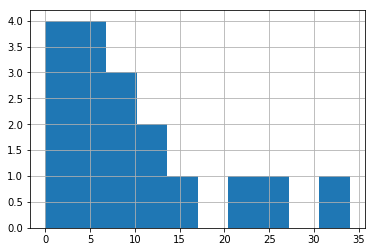

In [17]:
%matplotlib inline
df['likes_count'].hist()

In [41]:
import seaborn as sns

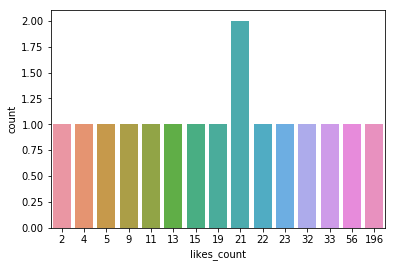

In [43]:
sns.countplot(df['likes_count'])

In [86]:
df['comments_count'] = df['comments'].map(lambda x: x['count'])

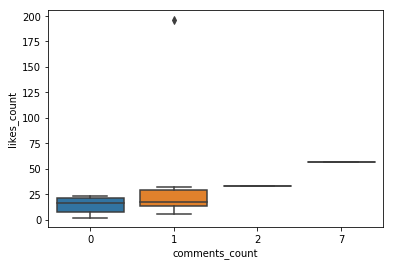

In [51]:
sns.boxplot(x='comments_count', y='likes_count', data=df)

### Блиц!

(2 балла) С помощью функции pandas['column_name'].map() преобразуйте колонку dimensions из dict'ов в числа. Создайте новые колонки height, width, которые будут содержать количество высоту и ширину фотографии.

### Бонус (если успеем)

Было бы здорово скачать несколько страничек, а то данных мало...

In [98]:
'asfdasdf {number}asd {string}asd asd '.format(number='123', 
                                               string='world')

'asfdasdf 123asd worldasd asd '

In [99]:
max_id = ''

nodes = []

for _ in range(10):
    resp = requests.get(
        'https://www.instagram.com/explore/tags/hse/?__a=1{}'\
            .format(max_id)).json()
    
    nodes += resp['tag']['media']['nodes']

    if resp['tag']['media']['page_info']['has_next_page']:
        max_id = '&max_id=' + \
            resp['tag']['media']['page_info']['end_cursor']
        print(max_id)
    else:
        break

&max_id=J0HWiJzkgAAAF0HWiJTGAAAAFiYA
&max_id=J0HWiJzkgAAAF0HWiIeIQAAAFkwA
&max_id=J0HWiJzkgAAAF0HWiHhBgAAAFnIA
&max_id=J0HWiJzkgAAAF0HWiHDQgAAAFpgBAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiGl2gAAAFr4BAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiGFWgAAAFuQBAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiFpvAAAAFooCAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiFVLwAAAFrACAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiEw1QAAAFtYCAA%3D%3D
&max_id=J0HWiJzkgAAAF0HWiEQsgAAAFvwCAA%3D%3D


In [101]:
df_big = pd.read_json(json.dumps(nodes))

In [102]:
df_big

,caption,code,comments,comments_disabled,date,dimensions,display_src,id,is_video,likes,owner,thumbnail_resources,thumbnail_src,video_views
0,⚡️⚡️⚡️Burn to the ground on the stage @dashmak...,BcMc_bJHH_9,{'count': 1},False,2017-12-02 09:19:30,"{'height': 720, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660829866366107648,False,{'count': 9},{'id': '435027725'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
1,-Trans Continent-\n\nFirst truck is doing on i...,BcMbhY_htUt,{'count': 0},False,2017-12-02 09:06:39,"{'height': 810, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660823404427007232,False,{'count': 9},{'id': '5346840370'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
2,-Trans Continent-\n\nWe prepare of 550 tonnes ...,BcMZ4EoBopx,{'count': 0},False,2017-12-02 08:52:17,"{'height': 810, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660816167012829696,False,{'count': 12},{'id': '5346840370'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
3,Эксперименты #hse,BcMXzjhg6XO,{'count': 1},False,2017-12-02 08:34:11,"{'height': 810, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660807060499179008,False,{'count': 18},{'id': '1127412701'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
4,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXQeZgCeg,{'count': 0},False,2017-12-02 08:29:24,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804649814337536,False,{'count': 4},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
5,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXNabgEc3,{'count': 0},False,2017-12-02 08:28:59,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804439394502400,False,{'count': 3},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
6,#isgsorulari #isgb #isg #osgb #isguveligi #işg...,BcMXJD3AUi6,{'count': 0},False,2017-12-02 08:28:23,"{'height': 480, 'width': 480}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660804140281972992,False,{'count': 4},{'id': '6102083261'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
7,"Yesterday at the ""Золотая Вышка"" award ceremon...",BcMWddNj0rM,{'count': 1},False,2017-12-02 08:22:26,"{'height': 1350, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660801143846947584,False,{'count': 22},{'id': '443359248'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
8,نمی‌توانی به عقب بازگردی \nتا آغاز ماجرا را تغ...,BcMWKTBFsSe,{'count': 0},False,2017-12-02 08:19:49,"{'height': 841, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660799827230246144,False,{'count': 3},{'id': '2304355346'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN
9,فلرهایی که میسوزند و میسوزانند.\nهم اکنون، عسل...,BcMUW9XFPdP,{'count': 0},False,2017-12-02 08:04:04,"{'height': 1350, 'width': 1080}",https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,1660791901237081856,False,{'count': 59},{'id': '1697709006'},[{'src': 'https://instagram.fiev2-1.fna.fbcdn....,https://instagram.fiev2-1.fna.fbcdn.net/t51.28...,NaN


## Домашнее задание:

1. (3 балла) Составьте несколько pandas.DataFrame с "top_posts" Инстаграма для разных локаций. Для этого понадобится найти ссылку на страничку с локацией: ее можно получить из адреса сайта при поиске в десктопе: <img src="location.png"><br>
Для N.Y. ссылка выглядит так: https://www.instagram.com/explore/locations/212988663/new-york-new-york/ . Соответственно, ссылка с json-ом выглядит так: https://www.instagram.com/explore/locations/212988663/new-york-new-york/?__a=1 <br>
Давайте возьмем Нью-Йорк, Париж, Рим, Берлин, Нью-Дели и Минск.

2. (3 балла) Для каждого DataFrame'a создайте новую колонку 'location', в которую (для каждой строчки) положите название локации. Объедините все DataFrame'ы в одну функцию pd.concat([df1, df2, df3...])

3. (3 балла) Постройте box plot, в котором на одном графике отобразите количество лайков для разных локаций. По x - локации, по y - количество лайков. Выглядеть должно примерно так: <img src="https://plot.ly/~cufflinks/35/a-b-c-d-e.png">